# K-Nearest-Neighbors Classification on Iris Dataset

![iris_image](./images/iris_flower.jpg)
_Figure 1: Iris flowers are composed of petals and sepals. Different types of irises will have different types of iris and petal sizes._

Our iris dataset samples different types of irises and records their petal and sepal sizes.

Each sample iris contains: sepal length, sepal width, petal length, petal width. As well as the type for the iris: Setosa, Versicolour, and Virginica.  

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = np.array(iris.data) # features (petal and sepal sizes)
y = np.array(iris.target) # label (iris type)

print("X")
# Each X column represent: sepal-length sepal-width petal-length petal-width
print(X[:5, :]) # display first 5 samples (rows) of dataset

print()

# y values represent: 0-Setosa, 1-Versicolour, 2-Virginica

print("y")
y_vert = np.array([y]).T # convert y to vertical vector
print(y_vert[:5]) # display first 5 labels (seems like they're all Setosa irises)

X
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

y
[[0]
 [0]
 [0]
 [0]
 [0]]


Our goal is to build a classifier (algorithm) that identifies whether an iris is a Setosa, Versicolour, or Virginica.  
For example:
We find an iris on the road and we want to identify it. We measure its sepal length and width, and its petal length and width. Now we give it to our classifier, which will do some computations and output an iris type.

Let's understand how our classifier will work. First, we'll simplify this problem by only focusing on petal size. So suppose we identify irises only based on its pettal size.

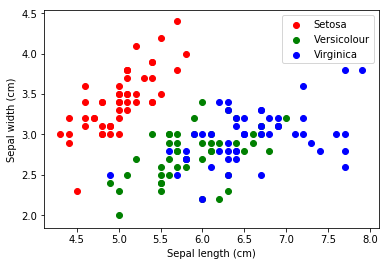

In [4]:
import matplotlib.pyplot as plt

labels = {0: "Setosa", 1:"Versicolour", 2:"Virginica"}
labels_color = {0: 'red', 1:'green', 2:'blue'}

# graph each iris type
for key in labels:
    indices = np.where(y==key)
    plt.scatter(X[indices, 0], X[indices, 1], c=labels_color[key], label=labels[key])

# label graph
plt.legend()
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

The above figure represents each type of iris as a color. This figure shows the approximate petal size each iris type has.

To build our classifier, we can use a simple algorithm called k-nearest-neighbors (KNN). Here's how it goes in our simplified problem:

![3-nearest-neighbors](./images/3-nn.png)
_Figure 2: This figure shows how KNN identifies an iris type. The star represents an iris to be identified._

Suppose we found an iris with petal length 5.5 cm and petal width 3.7 cm and want to identify it. A KNN algorithm with $k=3$ will first locate our point $(5.5, 3.7)$, represented in the figure above as a star. It then finds the 3 nearest points, as circled in the shown above. Finally, it identifies our new iris' type based on the most popular type among its 3 neighbors. In this case, since its neighbors are all Iris Setosa, then our new iris will also be an Iris Setosa .

Below is an implementation of our KNN:

In [6]:
import numpy as np

def k_nearest_neighbor(input_sample, X, y, k):
    """
    Input Parameters:
    input_sample (1D numpy array): attributes of sample to be laballed
    X (2D numpy array): list of iris samples
    y (1D numpy array): label for every X sample
    k (int): k value in KNN
    """
    # Calculate distances from input_sample
    diff = X - input_sample # find difference between input_sample and data for each attribute
    diff = np.square(diff) # square all values
    distances = np.sum(diff, 1) # sum rows
    
    # Find smallest k distances
    idx = np.argpartition(distances, k)
    
    # Find neighbors' most common label
    nearest_labels = y[idx[:k]]
    label_idx = np.bincount(nearest_labels).argmax()
    
    return y[label_idx]

Let's test it out

In [7]:
labels = {0: "Setosa", 1:"Versicolour", 2:"Virginica"}
input_sample = np.array([5.5, 3.7])
label = k_nearest_neighbor(input_sample, X[:,:2], y, 3)
print("Input sample's predicted label:", labels[label])

Input sample's predicted label: Setosa
